In [1]:
import heptrkx
from heptrkx import *
from heptrkx import master
from heptrkx.nx_graph import utils_plot, utils_data
from heptrkx.preprocess import utils_mldata
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from pandas import DataFrame
import numpy as np
import networkx as nx
from scipy.cluster.vq import vq, kmeans, whiten

In [2]:
# Construct event
source_dir = '../data/'
evtid = 21000
event = master.Event(source_dir, evtid)
event.read(evtid)

event_hits = event.hits
event_truth = event.truth
event_particles = event.particles

In [3]:
event.hits.columns
event_particles


,particle_id,particle_type,vx,vy,vz,px,py,pz,q,nhits,pt
0,4503668346847232,-211,0.040512,0.027287,6.039270,-0.505992,-1.595230,1.728730,-1,11,1.673555
1,4503805785800704,321,0.040512,0.027287,6.039270,30.096701,8.197130,109.325996,1,10,31.193018
2,4503874505277440,211,0.040512,0.027287,6.039270,24.123199,6.502430,88.157501,1,10,24.984203
3,4503943224754176,-211,0.040512,0.027287,6.039270,0.634312,-0.058675,2.102420,-1,12,0.637020
4,4504011944230912,321,0.040512,0.027287,6.039270,2.902970,1.100720,9.260090,1,13,3.104645
...,...,...,...,...,...,...,...,...,...,...,...
12665,981804509976068096,-321,-0.077258,-0.031452,174.401993,-2.166440,-0.082725,-1.768100,-1,12,2.168019
12666,981804578695544832,211,-0.077258,-0.031452,174.401993,-0.829764,-0.317760,-0.123488,1,11,0.888527
12667,981808220827811840,-211,-0.071101,0.309412,175.179001,0.282236,1.499240,2.439830,-1,10,1.525575
12668,981808220844593153,-211,40.747398,650.101990,1218.500000,0.168532,-0.073222,-0.021176,-1,0,0.183751


In [4]:
ten_particles = np.unique(event.hits.particle_id)[1:11]

In [5]:
hits = event.hits[event.hits.particle_id.isin(ten_particles)]
hits

,hit_idx,hit_id,x,y,z,volume_id,layer_id,module_id,evtid,particle_id,...,q,nhits,pt,layer,r,phi,eta,r3,absZ,tpt
21014,21014,21015,31.919600,5.464230,-10.27730,8,2,105,21000,4504355541614592,...,-1.0,10.0,1.127887,7,32.383926,0.169544,-0.312259,33.975601,10.27730,1.127256
22384,22384,22385,-9.576100,-30.949200,39.55220,8,2,116,21000,4503668346847232,...,-1.0,11.0,1.673555,7,32.396832,-1.870867,1.029263,51.126617,39.55220,1.672774
22646,22646,22647,16.225500,-27.662001,20.81390,8,2,118,21000,4504286822137856,...,1.0,9.0,0.243504,7,32.069504,-1.040316,0.610406,38.231815,20.81390,0.243495
22918,22918,22919,31.522499,0.588186,9.99688,8,2,120,21000,4504424261091328,...,1.0,15.0,1.053054,7,31.527987,0.018657,0.311993,33.074940,9.99688,1.052664
23045,23045,23046,33.099400,0.589824,10.18170,8,2,121,21000,4504424261091328,...,1.0,15.0,1.053054,7,33.104656,0.017818,0.302908,34.635029,10.18170,1.052646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125339,125339,125340,811.908020,215.761002,2944.50000,18,12,52,21000,4503805785800704,...,1.0,10.0,31.193018,47,840.087769,0.259742,1.967091,3061.997314,2944.50000,31.174234
125342,125342,125343,802.468018,209.906998,2944.50000,18,12,52,21000,4503874505277440,...,1.0,10.0,24.984203,47,829.467224,0.255844,1.979331,3059.100586,2944.50000,24.945610
125346,125346,125347,866.939026,205.020004,2955.50000,18,12,53,21000,4503943224754176,...,-1.0,12.0,0.637020,47,890.851501,0.232221,1.914370,3086.842285,2955.50000,0.627529
125351,125351,125352,812.093018,215.917999,2947.50000,18,12,54,21000,4503805785800704,...,1.0,10.0,31.193018,47,840.306885,0.259866,1.967819,3064.942383,2947.50000,31.173887


In [6]:
# hits.hit_id[21014]
hits.sort_values(by=['r'])

,hit_idx,hit_id,x,y,z,volume_id,layer_id,module_id,evtid,particle_id,...,q,nhits,pt,layer,r,phi,eta,r3,absZ,tpt
22918,22918,22919,31.522499,0.588186,9.996880,8,2,120,21000,4504424261091328,...,1.0,15.0,1.053054,7,31.527987,0.018657,0.311993,33.074940,9.996880,1.052664
24597,24597,24598,31.848900,-2.416950,111.318001,8,2,136,21000,4503943224754176,...,-1.0,12.0,0.637020,7,31.940477,-0.075743,1.961638,115.809723,111.318001,0.636728
24645,24645,24646,29.899900,11.241000,101.177002,8,2,137,21000,4504011944230912,...,1.0,13.0,3.104645,7,31.943140,0.359607,1.870098,106.099716,101.177002,3.104033
24681,24681,24682,30.885401,8.422310,118.080002,8,2,137,21000,4503805785800704,...,1.0,10.0,31.193018,7,32.013172,0.266222,2.016251,122.342674,118.080002,31.193504
24679,24679,24680,30.910400,8.350720,118.855003,8,2,137,21000,4503874505277440,...,1.0,10.0,24.984203,7,32.018547,0.263860,2.022405,123.092239,118.855003,24.983408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125364,125364,125365,943.265015,279.924988,2952.500000,18,12,55,21000,4504011944230912,...,1.0,13.0,3.104645,47,983.924194,0.288483,1.818680,3112.131592,2952.500000,3.071607
124182,124182,124183,-916.692993,-386.471008,2152.500000,18,8,7,21000,4504561700044800,...,1.0,11.0,2.120502,45,994.829590,-2.742612,1.514531,2371.274414,2152.500000,2.115652
120314,120314,120315,981.919983,-270.459015,130.000000,17,4,1742,21000,4504424261091328,...,1.0,15.0,1.053054,41,1018.486572,-0.268774,0.127296,1026.749634,130.000000,1.042607
118763,118763,118764,922.992004,431.975006,-520.400024,17,4,847,21000,4504355541614592,...,-1.0,10.0,1.127887,41,1019.076355,0.437735,-0.490725,1144.260742,520.400024,1.118780


/global/homes/c/cheliu/.conda/envs/heptrkx/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/global/homes/c/cheliu/.conda/envs/heptrkx/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \


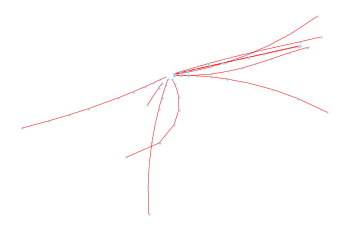

In [7]:
G = nx.Graph()
# for hit in hits:    
#     G.add_node(hit['hit_id'])

# need to store hit_id, particle_id, volume_id, layer_id, module_id, r, phi, z into nodes (hit_id is the node
#name)

for hit_idx, row in hits.iterrows():
    G.add_node(row['hit_id'], particle_id=row['particle_id'], pos=[row['r'], row['phi'], row['z']],\
               volume_id=row['volume_id'], layer_id=row['layer_id'])


# iterate through r
paths = {}# paths can be a dictionary
for index, row in hits.iterrows():
    #do stuff
    hit_id = row['hit_id']
    particle_id = str(row['particle_id'])
    if particle_id not in paths:
        paths[particle_id] = []
    paths[particle_id].append(hit_id)


# for everything in paths, add edge to G

for path in paths: 
    prev_hit = paths[path][0]
    for hit in paths[path]:
        if prev_hit != hit:
            G.add_edge(prev_hit, hit, solution=np.array([1]))
            prev_hit = hit



utils_plot.plot_networkx(G)

In [175]:
# divide all hits into 4 bins in phi
phi1, phi2, phi3, phi4 = [], [], [], []
for index, row in hits.iterrows():
#     total_nhits += p.nhits
        phi = row['phi']
        if phi >= 0 and phi < np.pi / 2:
            phi1.append(row['hit_id'])
        elif phi >= np.pi / 2 and phi <= np.pi:
            phi2.append(row['hit_id'])
        elif phi >= -np.pi and phi < -np.pi / 2:
            phi3.append(row['hit_id'])
        else:
            phi4.append(row['hit_id'])
# print(phi1)     

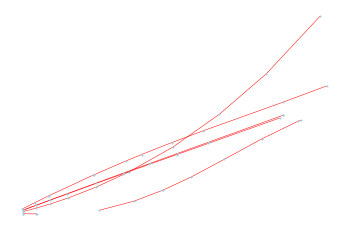

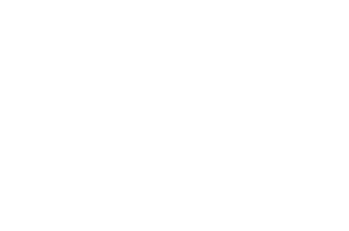

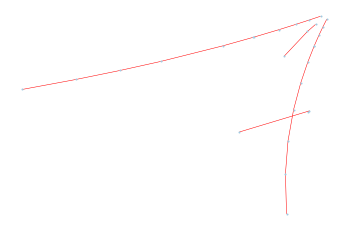

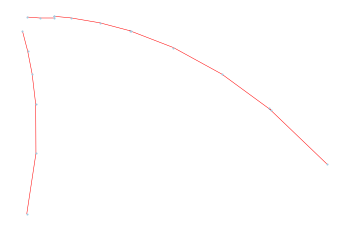

In [176]:
G_phi1 = nx.subgraph(G, phi1)
G_phi2 = nx.subgraph(G, phi2)
G_phi3 = nx.subgraph(G, phi3)
G_phi4 = nx.subgraph(G, phi4)
utils_plot.plot_networkx(G_phi1)
utils_plot.plot_networkx(G_phi2)
utils_plot.plot_networkx(G_phi3)
utils_plot.plot_networkx(G_phi4)

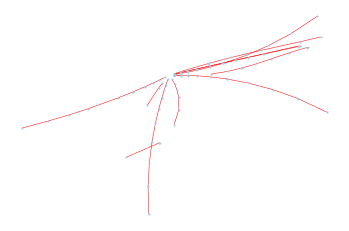

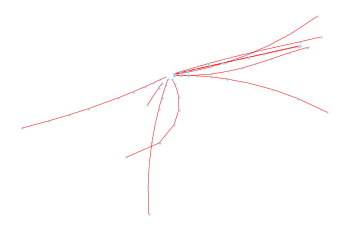

In [177]:
G_joint = nx.union(G_phi1, G_phi2)
G_joint = nx.union(G_joint, G_phi3)
G_joint = nx.union(G_joint, G_phi4)
utils_plot.plot_networkx(G_joint)
utils_plot.plot_networkx(G)


In [17]:


# utils_mldata.get_track_parameters(np.array(hits.x.tolist()), np.array(hits.y.tolist()), np.array(hits.z.tolist()))
# list(nx.connected_components(G))
# use the paths dictionary to build a list of nodes 
# for each particle id, create a list of (x, y, z) tuples
# for i,j in zip(G.nodes.data('particle_id'), G.nodes.data('pos_xyz')):
#     print(i,j)
# paths_params = {}
# for path in paths:
#     hit_ids = paths[path]  
#     x, y, z = [], [], []
#     for hit_id in hit_ids:
#         pos = G_joint.node[hit_id]['pos_xyz']    # get the xyz position list
# #         print(pos)
#         x.append(pos[0])
#         y.append(pos[1])
#         z.append(pos[2])
#     paths_params[path] = utils_mldata.get_track_parameters(np.array(x), np.array(y), np.array(z))
# print(paths_params)

In [178]:
# this function takes in a graph and outputs a list of tracking parameters
def fit_tracks_in_graph(graph):
    
    def cylindrical_to_cartesian(pos):
        x = pos[0] * np.cos(pos[1])
        y = pos[0] * np.sin(pos[1])
        return x, y, pos[2]
    
    
    track_parameters = []
    # node attribute has hit_id, pos=[r,phi,z]
    connected_components = list(nx.connected_components(graph))
    for component in connected_components:
        path = nx.subgraph(graph, component)    # path is a graph containing only one connected component
        x, y, z = [], [], []
        for n in path.nodes.data():       
            cartesian_pos = cylindrical_to_cartesian(n[1]['pos'])
            x.append(cartesian_pos[0])
            y.append(cartesian_pos[1])
            z.append(cartesian_pos[2])
        p = utils_mldata.get_track_parameters(np.array(x), np.array(y), np.array(z))
        track_parameters.append(p)
        
    return track_parameters

In [179]:

phi1_track_param = fit_tracks_in_graph(G_phi1)
phi2_track_param = fit_tracks_in_graph(G_phi2)
phi3_track_param = fit_tracks_in_graph(G_phi3)
phi4_track_param = fit_tracks_in_graph(G_phi4)
G_track_param = fit_tracks_in_graph(G)
G_joint_track_params = fit_tracks_in_graph(G_joint)
# print(phi1_track_param)
# print(phi2_track_param)
# print(phi3_track_param)
# print(phi4_track_param)
# print()
# print(G_track_param)

seg_track_params = []
seg_track_params.extend(phi1_track_param)
seg_track_params.extend(phi2_track_param)
seg_track_params.extend(phi3_track_param)
seg_track_params.extend(phi4_track_param)
# print(seg_track_params)


# list all tracks that are not in G
# all tracks that are not in G_track_param are segmented by the phi bins
broken_track_params = [p for p in G_joint_track_params if p not in G_track_param]
np.unique(broken_track_params)
print(broken_track_params)
# broken tracks, now how do you construct 

[(0.4283092805621891, 6.031882069324434, 1.580780398753018, 0.12780972309381347, 1.9355577028256803), (46.185055127859414, 147.14722367912947, -1.413640951816122, 1.9196198378124392, -2.073086383114837), (0.0113802699218013, 6.923751338401047, 2.466074782983284, 1.781940542252938, -0.6644274124310043), (7.867571355294444, -71.45895730497033, 0.5340961676244239, 0.6066975609573171, 0.2434352628973914), (0.18563310005862377, 5.801713367877194, -2.571140722182076, 0.44360491727437956, 0.23262787177421734), (0.06900905473526109, 6.273918441467945, 1.476904660154058, 1.9085684253715345, -0.5993166001599014), (0.16547361899642965, 6.785219171175701, -1.5442722116208143, 0.12266727061966523, 1.0504907333700053)]


In [180]:
""" returns true iff G1 G2 have the same particle_id but not the same graph"""
def from_same_track(G1, G2):
    for node, data in G1.nodes(data=True):
        n1 = data['particle_id']
#         print(n1)
        break
    for node, data in G2.nodes(data=True):
        n2 =  data['particle_id']
        break
#     print(n1, n2)
    return n1 == n2 and utils_data.is_diff_networkx(G1, G2)

In [181]:
"""returns a list of paths that share the same particle_id. A path is a list of hit_id"""
""" for efficiency, j can start from the index of i, since within a graph every components are disconnected"""
def find_connected_components(G1, G2):
    track_segments = []
    for i in nx.connected_components(G1):
        ts = [i]
#         print(i)
        for j in nx.connected_components(G2):
            segment1 = nx.subgraph(G1, i)
            segment2 = nx.subgraph(G2, j)
            if from_same_track(segment1, segment2):
                ts.append(j)
        if ts != [i]:
            track_segments.append(ts)
    return track_segments

In [183]:
graph_list = [G_phi1, G_phi2, G_phi3, G_phi4]

# every_segmented_components is a list of collections of broken paths that should be connected
# for example, the zeroth element contains two paths
# if a path is broken into three parts in three bins, 
# so i need to search through every collection, if there are same paths across collections, i union them
every_segmented_components = []
i = 0
while i < 4:
    j = i
    while j < 4:
        t = find_connected_components(graph_list[i], graph_list[j])
        every_segmented_components.extend(t)
        j += 1
    i += 1
    
# print(every_segmented_components)
# for paths in every_segmented_components:
    

In [184]:
every_segmented_components
"""This code doesn't work if a path spans more than 2 phi bins"""
# if a broken track is in phi1, phi2, phi3, then every_segmented_components will have 

"This code doesn't work if a path spans more than 2 phi bins"

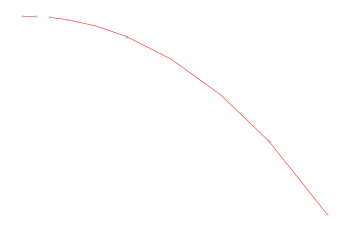

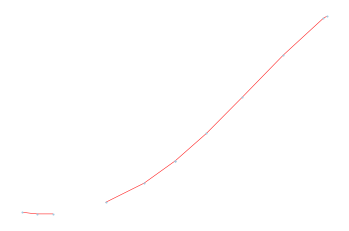

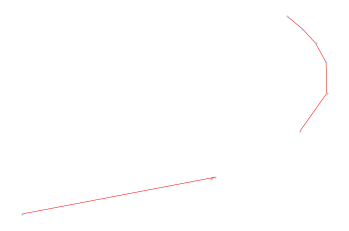

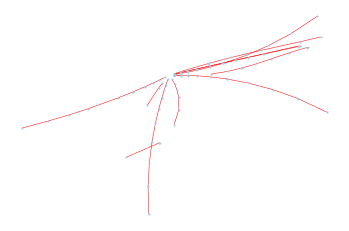

In [185]:
# these paths should all be connected:
every_segmented_components[0]

for j in range(3):
    gg2 = nx.Graph()
    for i in every_segmented_components[j]:
        gg = nx.subgraph(G, i)
        gg2 = nx.union(gg, gg2)
# print(every_segmented_components[0][0])
    
    utils_plot.plot_networkx(gg2)
utils_plot.plot_networkx(G_joint)
